<a href="https://colab.research.google.com/github/AlanaAnnaman/MLDATA/blob/main/KNN_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop('Id', axis = 1, inplace = True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [8]:
# so we are dropping our predictor 'Species' from the df
scalar.fit(df.drop('Species', axis = 1))

StandardScaler()

In [9]:
# we scaled the features which contained Sepeal Length, Width, Petal Length, Width
scaled_features = scalar.transform(df.drop('Species', axis = 1))

In [10]:
# creating a new data frame without the Species
df_feature = pd.DataFrame(data = scaled_features,
                          columns = df.columns[:-1])

In [11]:
df_feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [12]:
# import train test split
from sklearn.model_selection import train_test_split

# splitting the data 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df['Species'],
                                                    test_size = 0.30)

In [13]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
predict = knn.predict(X_test)

In [17]:
predict

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [18]:
# lets create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, predict))

[[13  0  0]
 [ 0 17  1]
 [ 0  1 13]]


Text(0.5, 1.0, 'Accuracy Score:0.9111111111111111')

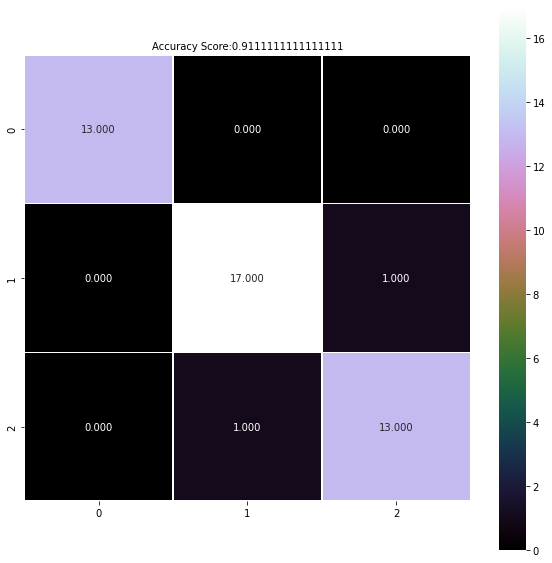

In [32]:
plt.figure(figsize = (10, 10))

sns.heatmap(confusion_matrix(y_test, predict),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="cubehelix")
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

In [21]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [22]:
### Repeat above steps for k = 5, see what happens with Accuracy

In [23]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [24]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
predict2 = knn5.predict(X_test)


In [26]:
print(confusion_matrix(y_test, predict2))

[[13  0  0]
 [ 0 18  0]
 [ 0  1 13]]


In [27]:
class_names = df.Species

Text(0.5, 1.0, 'Accuracy Score:0.9777777777777777')

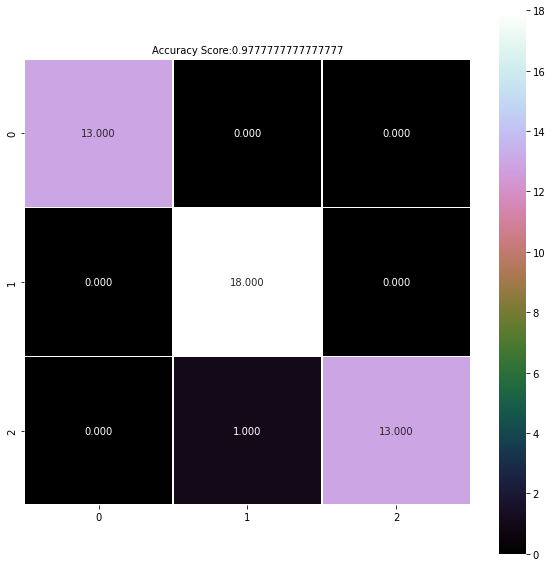

In [33]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict2),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="cubehelix")
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn5.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

## K Value and Accuracy

In [29]:
# this is a place holder for Accuracy
from sklearn import metrics
score = []

In [30]:
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111]


TypeError: ignored

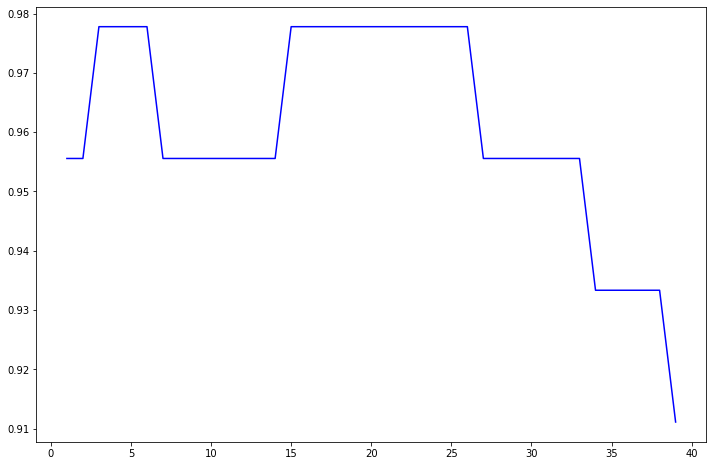

In [31]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(
         range(1,40),
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 10
         )
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")